# XY-calibration (F3)

In [1]:
cd ..

/Users/Vincent/Github/FireBallPipe


In [2]:
# %matplotlib widget
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
from astropy.io import fits
from astropy import wcs, coordinates
from astropy import units as u
from astropy.wcs.utils import proj_plane_pixel_scales
from matplotlib import pyplot as plt
from astropy.table import Table, vstack 
import matplotlib.patches as patches
import unittest
from mpl_interactions import heatmap_slicer
import pandas as pd
import datetime 
# os.chdir(os.path.dirname(os.path.realpath(__file__)))
sys.path.insert(1, './Calibration')
from guider2UV.guider2UV import Guider2UV, diff_skycoord, fit_model, plot_fit
from Calibration.mapping import Mapping

## initialization from last xy calib
---------------------------------

In [6]:
# prerequisites:
Field = "F3"
# previous_xy_mapping = 'Notebook/Files/Guider2UV_%s_nogamma.new.pkl'%(Field)
previous_xy_mapping = "Calibration/Mappings/2022/XY/F1_prep1_XY_220715.pkl"
# mask_det_map_file = "Calibration/Mappings/2022/mapping-mask-det-w-2022-5-%s_center.pkl"%(Field)
mask_det_map_file = "Calibration/Mappings/2022/mapping_new_center/mapping-mask-det-w-2022-5-%s_-20.pkl"%(Field)
target_filename = 'Calibration/Targets/2022/targets_%s.csv'%(Field)
# mapping_diffuse_image = "/Users/Vincent/Nextcloud/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/all_diffuse_illumination/FocusEvolution/%s/%s_2022_6_-82.fits"%(Field,Field)
# new_diffuse_image = "/Users/Vincent/Nextcloud/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/all_diffuse_illumination/FocusEvolution/%s/%s_2022_6_-106.fits"%(Field,Field)
# encoder gains 2018:
# CEg = 1.02928
# Elg = 1.00379
# encoder gains 2022:
CEg = 1.0187
Elg = 1.0090
print("After calibration of the encoders, El is %0.5f ''/inc and Ce is %0.5f ''/inc" %(Elg*0.092,CEg*0.01))


After calibration of the encoders, El is 0.09283 ''/inc and Ce is 0.01019 ''/inc


In [7]:
# load model from previous XY calib 
G2UV = Guider2UV(filename=previous_xy_mapping)
print(G2UV)

## eventually reset the guider-scmask rotation to 0 and magnification correction to 0.
G2UV.mask_rotation = 0.0*u.arcmin
G2UV.FieldP.gamma = 1. 

# if you already know the approx angular distance between guidercenter and FOVcenter, set it:
#G2UV.FOV_center_guider_coord = coordinates.SkyCoord(delta_x*u.deg, # x guider axis (x axis in guider local frame, see XYcalib figure)
#                                                    delta_y*u.deg, # y guider axis (y axis guider local frame, see XYcalib figure)
#                                                    frame = G2UV.GuiderP.localframe)


# load targets
F1 = Table.read(target_filename, format='ascii')

# load mask-UVdetector mappings
mask_det_map = Mapping(mask_det_map_file)



FOV center angular position in guider <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (250.39272815, 36.41856381)>): (lon, lat) in deg
    (0.18640794, -0.08284778)>
FOV center pixel position in guider [array(1378.69397987), array(218.86229257)]

Guider2UV object:
    Local Field Projector: 
ScienceMaskProjector object:
    LocalFrame: <SkyOffsetICRS Frame (rotation=-90.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (32.19, -5.688)>)>
    gamma: 1.0324778102105137

    Guider Field Projector: 
GuiderMaskProjector object:
    LocalFrame: <SkyOffsetICRS Frame (rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (250.39272815, 36.41856381)>)>
    wcs: WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 250.392728151  36.4185638082  
CRPIX : 640.0  540.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.00024551548564194  0.00024661678545423  
NAXIS : 0  0

    mask_rotation: -58.6451

FileNotFoundError: [Errno 2] No such file or directory: 'Calibration/Mappings/2022/mapping_new_center/mapping-mask-det-w-2022-5-F3_-20.pkl'

## Alternative initialisation for new fields:
---------------------------------------

In [6]:

# # prerequisites:
# previous_xy_mapping = 'Notebook/Files/Guider2UV_F1_nogamma.new.pkl'
# mask_det_map_file = "Calibration/Mappings/2022/mapping-mask-det-w-2022-5-F1.pkl"
# target_filename = 'Calibration/Targets/2022/targets_F1.txt'
# mapping_diffuse_image = "/Users/Vincent/Nextcloud/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/all_diffuse_illumination/FocusEvolution/F1/F1_2022_6_-82.fits"
# new_diffuse_image = "/Users/Vincent/Nextcloud/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/all_diffuse_illumination/FocusEvolution/F1/F1_2022_6_-106.fits"

# f_ra, f_dec, f_rot = 0, 0, 0
# Field_center=coordinates.SkyCoord(f_ra * u.deg, f_dec * u.deg)
# # get FOVcenter & guider wcs from another field
# #  put pkl from a functionning mapping from another field
# G2UVother = Guider2UV(filename=previous_xy_mapping)
# FOVcenter = G2UVother.FOV_center_guider_coord
# guider_wcs = G2UVother.GuiderP.w
# G2UV = Guider2UV(Field_center=Field_center,
#                  Field_rotation= f_rot * u.deg,
#                  Field_gamma=1.0,  # platescale correction (need to update the polynomial in the MaskAstrometry.py)
#                  FOVcenter_guider_coord=FOVcenter,
#                  guider_wcs = guider_wcs,
#                  )
                 
# FNEW = Table.read(target_filename, format='ascii')
# mask_det_map = Mapping(mask_det_map_file)

# # print(G2UV)

## 1-  Rotate mask carousel
## 2- Diffuse UV image

In [7]:
# data1 = fits.open(mapping_diffuse_image)[0].data[1404:1500,1925:2080]
# data2 = fits.open(new_diffuse_image)[0].data[1404:1500,1925:2080]
# data1 = (data1-data1.min()) / (data1-data1.min()).ptp()
# data2 = (data2-data2.min()) / (data2-data2.min()).ptp()
# fig, axes = heatmap_slicer(
#     np.arange(data2.shape[1]),
#     np.arange(data2.shape[0]),
#     (data1, data2),
#     slices="both",
#     figsize = (8,8),
#     heatmap_names=("Old diffuse image", "Map based diffuse"),
#     labels=("Some wild X variable", "Y axis"),
#     interaction_type="click")
# plt.tight_layout()
# plt.show()



Copy the offset from [this spreadsheet step "Compute offsets with previous diffuse illumination image"](https://docs.google.com/spreadsheets/d/19jO0fZ0FL0zZKt8IgJ_DMlZrbCD0VXpYVeulKzXtHzY/edit#gid=0)

In [8]:
# This offset in X and Y should be positive if the slit position in tghe new image appears to be shifted towards the top right
diffuse_offset = np.array([-0.7,-4.1])
G2UV.set_detector_mapping(mask_det_map, offsets = diffuse_offset)
direct_map = lambda w, x, y: mask_det_map.map(w, x, y) + diffuse_offset
inv_map = lambda w, x, y: mask_det_map.inv_map(w, x - diffuse_offset[0], y - diffuse_offset[1])

## 3 - Set guider at best focus          
## 4 - Align siderostat frames           
## 5 - Go to guider reference            
## 6 - Set UV/guider best focus offset   
## 7 - Rotate mask carousel              
## 8 - Through focus in UV               
## 9 - Note open-mask guider ref point   
    

## 10 - Go through the list of slits      

GC - 46 - 51 - 19 - 8 - 12 - 10 - 38 - 43

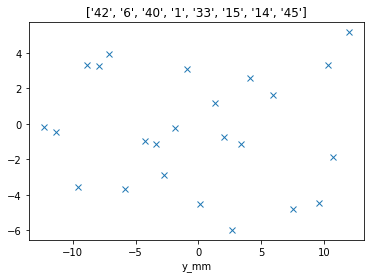

ValueError: Inconsistent data column lengths

In [9]:
slits = ['42', '6', '40', '1', '33', '15', '14','45']  #2012
# mask = F1.to_pandas()['Internal-count'].isin(slits)
F1p = F1.to_pandas()
from functools import reduce
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# selected_slits = F1[mask.values]['Internal-count',"x_mm","y_mm","ra","dec"]
selected_slits = Table.from_pandas((reduce(pd.DataFrame.append, map(lambda i: F1p[F1p['Internal-count'] == i],slits))))

ra,dec = "RA", "DEC"

plt.figure()
plt.plot(F1["x_mm"],F1["y_mm"],"x")
plt.plot(selected_slits["x_mm"],selected_slits["y_mm"],"-o")
for s in selected_slits:
    plt.text(s["x_mm"],s["y_mm"],s["Internal-count"])
plt.xlabel("x_mm")
plt.xlabel("y_mm")
plt.title(slits)
plt.show()

selected_slits = selected_slits['Internal-count',"x_mm","y_mm",ra,dec]
slit_path = vstack((selected_slits,selected_slits[::-1]) )
slit_path["ra_diff"] = list((slit_path[ra][:-1] - slit_path[ra][1:])*np.cos(slit_path[dec][:-1]*np.pi/180)) + [0]
slit_path["dec_diff"] = list((slit_path[dec][:-1] - slit_path[dec][1:])) + [0]

slit_path["ra_diff"] *= 3600
slit_path["dec_diff"] *= 3600
slit_path["angular_distance"] = np.sqrt(slit_path["ra_diff"]** 2 + slit_path["dec_diff"]** 2)
try:
    slit_path.to_pandas().to_clipboard()
except Exception:
    pass
slit_path


# selected_slits

The slits table has been copied. Add it to the [slit tab of this spreadsheet](https://docs.google.com/spreadsheets/d/19jO0fZ0FL0zZKt8IgJ_DMlZrbCD0VXpYVeulKzXtHzY/edit#gid=0)

In [10]:

moves, flags, slit_coords = G2UV.compute_autocoll_moves_slits(slits, F1, hystcomp = True, CEg = CEg, Elg = Elg)
print(moves,flags)
moves_tab = pd.DataFrame(np.hstack((moves,flags[:,None])), columns=["EL","CE","UV_image"])#,dtype=[("EL",float),("CE",float),("UV_image",float)])
print(moves_tab)
assert moves.sum(axis=0)[0] <0.1
assert moves.sum(axis=0)[1] <0.1
# slit_path['lon'] = [s.lon.deg*3600 for s in slits_coord]
# slit_path['lat'] =  [s.lat.deg*3600 for s in slits_coord]
# slit_path
print("(They have been copied to clipboard, paste it in the spreadsheet)")
moves_tab["UV_image"] = moves_tab["UV_image"].astype(bool)
try:
    moves_tab.to_clipboard()
except Exception:
    pass
moves_tab 
# print(slit_path.to_pandas(), moves_tab[moves_tab["UV_image"]])
from astropy.table import hstack
# print(len(slit_path),len(moves_tab[moves_tab["UV_image"]]))
print(hstack((slit_path, Table.from_pandas(moves_tab[moves_tab["UV_image"]][2:]))))

# pd.concat([slit_path.to_pandas(), moves_tab[moves_tab["UV_image"]][2:]], axis=1)
# hstack((slit_path,moves_tab[moves_tab["UV_image"]]))

slit position in mm on mask: [ 9.655641 -6.129349]
slit position in mm on mask: [-8.51572   4.436704]
slit position in mm on mask: [ 8.811543 -3.028793]
slit position in mm on mask: [-12.393879  -4.297548]
slit position in mm on mask: [5.386155 4.42581 ]
slit position in mm on mask: [-3.555182 -6.043112]
slit position in mm on mask: [-4.579503  5.650395]
slit position in mm on mask: [12.030937  1.720028]

targets local coords in siderostat local frame:
EL: 73.2 arcsec ; CE: 489.9 arcsec
EL: 520.0 arcsec ; CE: -271.1 arcsec
EL: 204.5 arcsec ; CE: 454.3 arcsec
EL: 150.6 arcsec ; CE: -434.1 arcsec
EL: 519.4 arcsec ; CE: 310.8 arcsec
EL: 77.2 arcsec ; CE: -63.3 arcsec
EL: 571.2 arcsec ; CE: -106.2 arcsec
EL: 405.2 arcsec ; CE: 589.6 arcsec

siderostat moves sequence: 
[[   0.          -30.        ]
 [  -0.           30.        ]
 [  73.23192994  489.93786226]
 [ 446.78678552 -761.04014512]
 [-315.56274935  725.43451671]
 [ -53.8600439  -888.43026949]
 [ 368.83959835  744.89681503]
 [-442.2

The moves has been copied. Add it to the [moves tab of this spreadsheet](https://docs.google.com/spreadsheets/d/19jO0fZ0FL0zZKt8IgJ_DMlZrbCD0VXpYVeulKzXtHzY/edit#gid=0)

Copy below the observed slits position from the [slit tab of this spreadsheet](https://docs.google.com/spreadsheets/d/19jO0fZ0FL0zZKt8IgJ_DMlZrbCD0VXpYVeulKzXtHzY/edit#gid=0)

In [23]:
slits_coord_obs_det = np.ones((len(slits)*2,2))
#  np.array([
# [1420.2,593.9	],
# [2039.1,965.9	],
# [1479.7,1706.4	],
# [1530.3,826.6	],
# [1529.5,825.49511	],
# [1479.4,1708.3128	],
# [2039.4,966.49409	],
# [1419.5,594.50322	]])

slit_path["x_det_obs"] = slits_coord_obs_det[:,0]
slit_path["y_det_obs"] = slits_coord_obs_det[:,1]
#TODO should add difference
slit_path
# slit_path.write("/tmp/slit.csv",overwrite=True)



Internal-count,x_mm,y_mm,RA,DEC,ra_diff,dec_diff,angular_distance,x_det_obs,y_det_obs
str2,float64,float64,float64,float64,float64,float64,float64,float64,float64
42,9.655641,-6.129349,37.131805,0.508607,1537.2150326896872,-893.0411999999998,1777.7943192688506,1.0,1.0
6,-8.51572,4.436704,36.704784,0.756674,-1465.230614990829,630.4932,1595.1245814520705,1.0,1.0
40,8.811543,-3.028793,37.111828,0.581537,1794.4967640807715,108.84600000000005,1797.794784732774,1.0,1.0
1,-12.393879,-4.297548,36.613331,0.551302,-1504.6043465003984,-737.5428000000003,1675.6502085279405,1.0,1.0
33,5.386155,4.42581,37.031296,0.756175,755.6281874012963,883.7460000000002,1162.747156569892,1.0,1.0
15,-3.555182,-6.043112,36.821381,0.51069,86.61255939597409,-987.5808000000001,991.371561007154,1.0,1.0
14,-4.579503,5.650395,36.797321,0.785018,-1405.308086426541,333.26640000000015,1444.284359516777,1.0,1.0
45,12.030937,1.720028,37.187721,0.692444,0.0,0.0,0.0,1.0,1.0
45,12.030937,1.720028,37.187721,0.692444,1405.337363679056,-333.26640000000015,1444.3128466926269,1.0,1.0


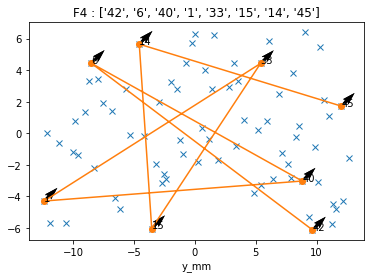

In [24]:
# TODO create some quiver of the error
plt.figure()
plt.plot(F1["x_mm"],F1["y_mm"],"x")
plt.plot(selected_slits["x_mm"],selected_slits["y_mm"],"-o")
for s in selected_slits:
    plt.text(s["x_mm"],s["y_mm"],s["Internal-count"])
plt.quiver(slit_path["x_mm"],slit_path["y_mm"],slit_path["x_det_obs"],slit_path["y_det_obs"])
plt.xlabel("x_mm")
plt.xlabel("y_mm")
plt.title(Field + " : %s"%(slits))
plt.show()

In [25]:
valid = np.isfinite(slits_coord_obs_det[:,0])
#valid = np.array([True]*8 + [False]*8)
# obs_wave = G2UV.mask_det_map.w[0]
try:
    obs_wave = G2UV.mask_det_map.w[0]
except (TypeError, AttributeError) as e:
    obs_wave = 0.2139
    obs_wave = 0.20619 #0.2139
print("wave: ", obs_wave)
slits_coord_valid = [slit_coords[i] for i in np.nonzero(valid)[0]]
slits_valid = np.array(slits + slits[::-1])[valid]

wave:  0.20619


### look at siderostat frame hysteresis 

In [37]:
mid  = len(slits_coord_obs_det)//2
pair_diff = slits_coord_obs_det[:mid] - slits_coord_obs_det[::-1][:mid]
# pair_diff
# fig, (ax0,ax1) = plt.subplots(1,2)
# ax0.plot(np.abs(pair_diff[:,0]),'*')
# ax0.plot(np.abs(pair_diff[:,0]),'-')
# ax0.set_title("El pair diff")
# ax0.set_ylabel("El arcsec")
# ax1.plot(np.abs(pair_diff[:,1]),'*')
# ax1.plot(np.abs(pair_diff[:,1]),'-')
# ax1.set_title("Ce pair diff")
# ax1.set_ylabel("Ce arcsec")
# fig.suptitle(Field + " : Hysteresis analysis")
# fig.tight_layout()

moves_sign  = np.sign(moves[2:mid+2])
pair_diff_signed = pair_diff * moves_sign
valid = np.arange(len(moves_sign))#[0,2,3,4]
fig, (ax0,ax1) = plt.subplots(1,2)
ax0.plot(pair_diff_signed[valid,0],'*-')
ax0.set_title("El pair diff")
ax0.set_ylabel("El arcsec")
ax1.plot(pair_diff_signed[valid,1],'*-')
ax1.set_title("Ce pair diff")
ax1.set_ylabel("Ce arcsec")
fig.suptitle("Hysteresis analysis")
fig.tight_layout()


UFuncTypeError: ufunc 'sign' did not contain a loop with signature matching types dtype([('EL', '<f8'), ('CE', '<f8'), ('UV_image', '<f8')]) -> dtype([('EL', '<f8'), ('CE', '<f8'), ('UV_image', '<f8')])

## 11- Note open-mask guider ref point
## 12- Update model with observed slit positions

Fitting rotation, translation and magnification
gamma: 2.0000000000000018
theta: 5.72499842663433e-13 arcmin
dx: -2041.0053869079022 arcsec
dy: -12553.1292973872 arcsec
variances: [1.49009679e-04 5.12257542e-01 1.97959993e+00 1.97959993e+00]

residuals in arcsec: [[ 1.59872116e-12 -6.39488462e-12]
 [ 3.59712260e-12 -3.19744231e-12]
 [ 1.99840144e-12 -6.39488462e-12]
 [ 1.19904087e-12 -6.39488462e-12]
 [ 3.99680289e-12 -1.27897692e-11]
 [ 1.59872116e-12 -6.39488462e-12]
 [ 3.99680289e-12 -6.39488462e-12]
 [ 3.19744231e-12 -6.39488462e-12]
 [ 3.19744231e-12 -6.39488462e-12]
 [ 3.99680289e-12 -6.39488462e-12]
 [ 1.59872116e-12 -6.39488462e-12]
 [ 3.99680289e-12 -1.27897692e-11]
 [ 1.19904087e-12 -6.39488462e-12]
 [ 1.99840144e-12 -6.39488462e-12]
 [ 3.59712260e-12 -3.19744231e-12]
 [ 1.59872116e-12 -6.39488462e-12]]
max residual in EL,CE 0.0, 0.0 arcsec
mean residual in EL,CE 0.0, 0.0 arcsec


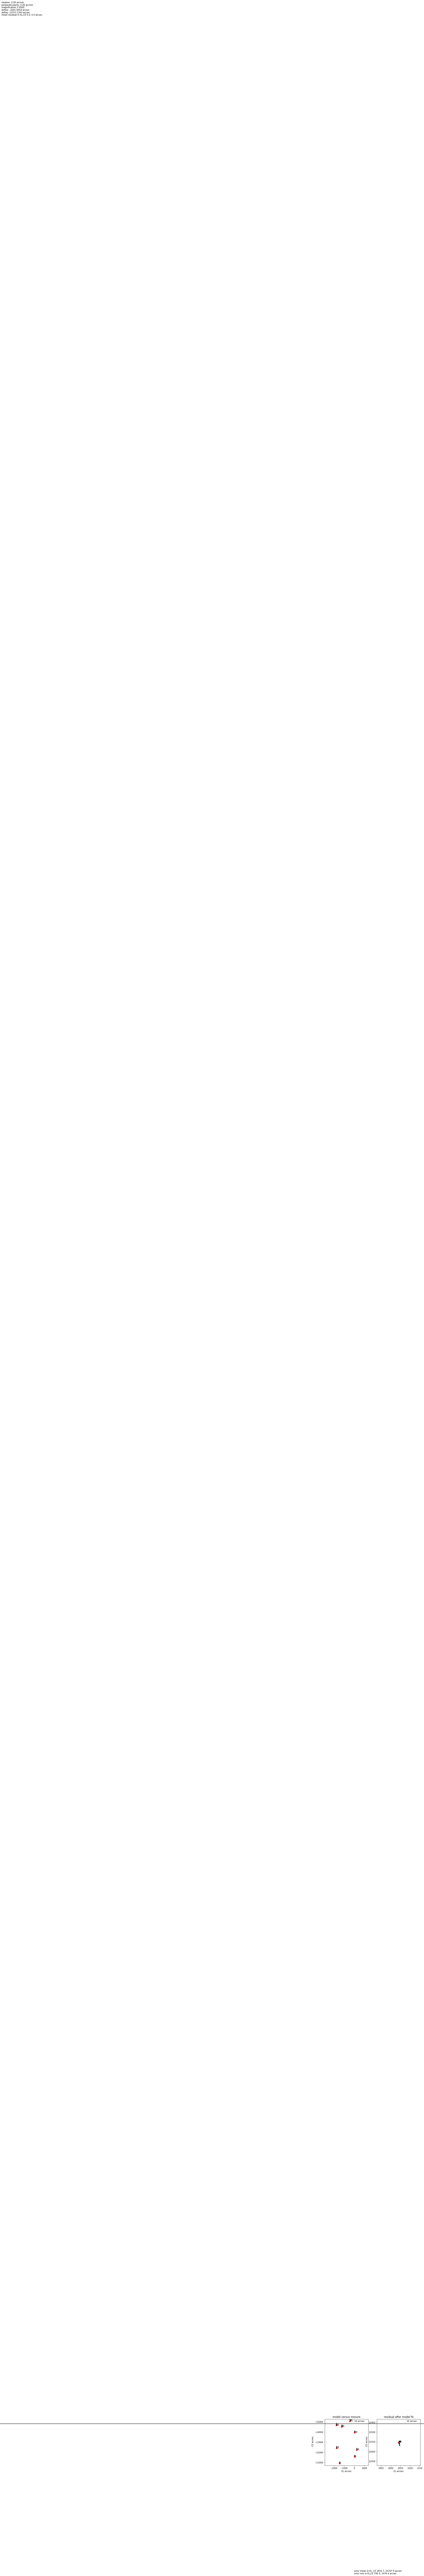

In [27]:
slits_coord_obs = G2UV.detector2guider(slits_coord_obs_det, wave=obs_wave, angle=True  )
weight = np.array( [1.]*16  + [1./(1. + 1e-1)]*16)
G2UVcor, residuals = G2UV.update_model(slits_coord_valid, slits_coord_obs, labels=slits_valid, plot=True)


### save corrected model for future use (eg redo the clalib on same field)

In [28]:
G2UVcor.save(filename="Calibration/Mappings/2022/XY/%s_XY_%s.pkl"%(Field,datetime.datetime.now().strftime("%y%m%d")))

Dumping to Calibration/Mappings/2022/XY/F4_XY_220714.pkl


## 13 - Rotate carousel to science mask
## 14 - Note open-mask guider ref point
## 15 - Check corrected model through science mask

In [36]:
moves, flags, slit_coords = G2UVcor.compute_autocoll_moves_slits(slits, F1, hystcomp = True, CEg = CEg, Elg = Elg)
moves = Table.from_pandas(pd.DataFrame(np.hstack((moves,flags[:,None])), columns=["EL","CE","UV_image"]))
print(moves)


slit position in mm on mask: [ 9.655641 -6.129349]
slit position in mm on mask: [-8.51572   4.436704]
slit position in mm on mask: [ 8.811543 -3.028793]
slit position in mm on mask: [-12.393879  -4.297548]
slit position in mm on mask: [5.386155 4.42581 ]
slit position in mm on mask: [-3.555182 -6.043112]
slit position in mm on mask: [-4.579503  5.650395]
slit position in mm on mask: [12.030937  1.720028]

targets local coords in siderostat local frame:
EL: -864.9 arcsec ; CE: 7141.2 arcsec
EL: 28.6 arcsec ; CE: 5619.1 arcsec
EL: -602.5 arcsec ; CE: 7070.0 arcsec
EL: -710.2 arcsec ; CE: 5293.2 arcsec
EL: 27.5 arcsec ; CE: 6782.9 arcsec
EL: -857.0 arcsec ; CE: 6034.7 arcsec
EL: 131.0 arcsec ; CE: 5949.0 arcsec
EL: -200.9 arcsec ; CE: 7340.5 arcsec

siderostat moves sequence: 
         EL                  CE         UV_image
------------------- ------------------- --------
                0.0               -30.0      0.0
               -0.0                30.0      1.0
 -864.9362327443581

In [31]:
moves["EL_abs"] =  [np.sum(moves["EL"][:i+1]) for i in range(len(moves))]
moves["CE_abs"] = [np.sum(moves["CE"][:i+1]) for i in range(len(moves))]
moves["UV_image"] = moves["UV_image"].astype(bool)
new_cat = hstack((slit_path,moves[moves["UV_image"]][1:-1]))
new_cat
new_cat["EL_moves"] =  list(new_cat["EL_abs"][1:] - new_cat["EL_abs"][:-1]) +  [0]
new_cat["CE_moves"] =  list(new_cat["CE_abs"][1:] - new_cat["CE_abs"][:-1]) +  [0]



new_cat["El_sky"] = new_cat["EL_moves"]  * 2 * Elg 
new_cat["Cel_sky"] = new_cat["CE_moves"] * 2 * CEg 
new_cat["Frame_angular_distance"] = np.sqrt(new_cat["El_sky"]**2 + new_cat["Cel_sky"]**2)
new_cat["frame_divided_sky"] = new_cat["Frame_angular_distance"] / new_cat["angular_distance"]
new_cat["EL_dec_ratio"] =   new_cat["El_sky"] / new_cat["dec_diff"]
new_cat["CE_ra_ratio"] =   new_cat["Cel_sky"] / new_cat["ra_diff"]
# new_cat
new_cat.to_pandas().to_clipboard()
new_cat["ra_diff","dec_diff","EL_moves","CE_moves","El_sky","Cel_sky","frame_divided_sky","EL_dec_ratio","CE_ra_ratio"]

/var/folders/m8/f6l41h_51qxdzrz8p1xqr3f80000gp/T/ipykernel_39387/744886026.py:14: RuntimeWarning: invalid value encountered in true_divide
  new_cat["frame_divided_sky"] = new_cat["Frame_angular_distance"] / new_cat["angular_distance"]
/var/folders/m8/f6l41h_51qxdzrz8p1xqr3f80000gp/T/ipykernel_39387/744886026.py:15: RuntimeWarning: invalid value encountered in true_divide
  new_cat["EL_dec_ratio"] =   new_cat["El_sky"] / new_cat["dec_diff"]
/var/folders/m8/f6l41h_51qxdzrz8p1xqr3f80000gp/T/ipykernel_39387/744886026.py:16: RuntimeWarning: invalid value encountered in true_divide
  new_cat["CE_ra_ratio"] =   new_cat["Cel_sky"] / new_cat["ra_diff"]


ra_diff,dec_diff,EL_moves,CE_moves,El_sky,Cel_sky,frame_divided_sky,EL_dec_ratio,CE_ra_ratio
float64,float64,float64,float64,float64,float64,float64,float64,float64
1537.2150326896872,-893.0411999999998,893.5735710445675,-1522.0802902364212,1803.2314663679372,-3101.0863833276844,2.0178107547359825,-2.019202995749734,-2.0173406565649237
-1465.230614990829,630.4932,-631.1254986968415,1450.8690334298562,-1273.611256370226,2956.000568709989,2.0178356650179974,-2.020023778797656,-2.0174302519119083
1794.4967640807715,108.84600000000005,-107.72008780521048,-1776.8605389873974,-217.37913719091472,-3620.175662132923,2.017302673566875,-1.997125637973969,-2.0173765339651384
-1504.6043465003984,-737.5428000000003,737.6791966942566,1489.7936300550818,1488.6366189290097,3035.3055418742238,2.0175439632953616,-2.0183731966863605,-2.0173446587032173
755.6281874012963,883.7460000000002,-884.4849160275118,-748.2300277057193,-1784.8905605435186,-1524.4438584476325,2.0187437187669235,-2.019687286328332,-2.0174523447707706
86.61255939597409,-987.5808000000001,987.9764815865631,-85.7393582670702,1993.7365398416841,-174.6853685333288,2.018793657588715,-2.018808526696432,-2.0168595611486864
-1405.308086426541,333.26640000000015,-331.8763344125297,1391.5187748022827,-669.7264428444848,2835.0803517821705,2.0169925043290378,-2.00958285277029,-2.0174084097041645
0.0,0.0,0.0,0.0,0.0,0.0,nan,nan,nan
1405.337363679056,-333.26640000000015,331.8763344125297,-1391.5187748022827,669.7264428444848,-2835.0803517821705,2.0169527217983414,-2.00958285277029,-2.017366381236863


In [ ]:
moves, flags, slit_coords = G2UVcor.compute_autocoll_moves_slits(slits, F1, hystcomp = True, CEg = CEg, Elg = Elg)
# moves = Table(data=moves, names=("EL","CE","UV_image"),dtype=(float,float,bool))

moves = Table.from_pandas(pd.DataFrame(np.hstack((moves,flags[:,None])), columns=["EL","CE","UV_image"]))
print(moves)
moves["EL_abs"] = [0] + list(moves["EL"][1:] - moves["EL"][:-1])
moves["CE_abs"] = [0] + list(moves["CE"][1:] - moves["CE"][:-1])

moves["UV_image"] = moves["UV_image"].astype(bool)
from astropy.table import hstack 
# Table.from_pandas(a[moves_tab["UV_image"]])[2:]
new_cat = hstack((slit_path,moves[moves["UV_image"]][1:-1]))


slit position in mm on mask: [ 9.655641 -6.129349]
slit position in mm on mask: [-8.51572   4.436704]
slit position in mm on mask: [ 8.811543 -3.028793]
slit position in mm on mask: [-12.393879  -4.297548]
slit position in mm on mask: [5.386155 4.42581 ]
slit position in mm on mask: [-3.555182 -6.043112]
slit position in mm on mask: [-4.579503  5.650395]
slit position in mm on mask: [12.030937  1.720028]

targets local coords in siderostat local frame:
EL: -873.0 arcsec ; CE: 7065.4 arcsec
EL: 25.2 arcsec ; CE: 5558.9 arcsec
EL: -609.2 arcsec ; CE: 6994.9 arcsec
EL: -717.5 arcsec ; CE: 5236.3 arcsec
EL: 24.0 arcsec ; CE: 6710.8 arcsec
EL: -865.0 arcsec ; CE: 5970.2 arcsec
EL: 128.1 arcsec ; CE: 5885.4 arcsec
EL: -205.5 arcsec ; CE: 7262.6 arcsec

siderostat moves sequence: 
         EL                  CE         UV_image
------------------- ------------------- --------
                0.0               -30.0      0.0
               -0.0                30.0      1.0
 -873.0107561206008

In [ ]:


print("(They have been copied to clipboard, paste it in the spreadsheet)")
new_cat["EL_moves"] = [0] + list(new_cat["EL_abs"][1:] - new_cat["EL_abs"][:-1])
new_cat["CE_moves"] = [0] + list(new_cat["CE_abs"][1:] - new_cat["CE_abs"][:-1])


print(Elg,CEg)
new_cat["El_sky"] = new_cat["EL_moves"]  * 2 * Elg 
new_cat["Cel_sky"] = new_cat["CE_moves"] * 2 * CEg 
new_cat["Frame_angular_distance"] = np.sqrt(new_cat["El_sky"]**2 + new_cat["Cel_sky"]**2)
new_cat["frame_divided_sky"] = new_cat["Frame_angular_distance"] / new_cat["angular_distance"]
new_cat["EL_dec_ratio"] =   new_cat["El_sky"] / new_cat["dec_diff"]
new_cat["CE_ra_ratio"] =   new_cat["Cel_sky"] / new_cat["ra_diff"]
# new_cat
new_cat.to_pandas().to_clipboard()
new_cat
# sys.exit()


# moves.to_clipboard()
# moves



(They have been copied to clipboard, paste it in the spreadsheet)
1.009 1.0187


/var/folders/m8/f6l41h_51qxdzrz8p1xqr3f80000gp/T/ipykernel_21522/3250877715.py:10: RuntimeWarning: divide by zero encountered in true_divide
  new_cat["frame_divided_sky"] = new_cat["Frame_angular_distance"] / new_cat["angular_distance"]
/var/folders/m8/f6l41h_51qxdzrz8p1xqr3f80000gp/T/ipykernel_21522/3250877715.py:11: RuntimeWarning: divide by zero encountered in true_divide
  new_cat["EL_dec_ratio"] =   new_cat["El_sky"] / new_cat["dec_diff"]
/var/folders/m8/f6l41h_51qxdzrz8p1xqr3f80000gp/T/ipykernel_21522/3250877715.py:12: RuntimeWarning: divide by zero encountered in true_divide
  new_cat["CE_ra_ratio"] =   new_cat["Cel_sky"] / new_cat["ra_diff"]


Internal-count,x_mm,y_mm,RA,DEC,ra_diff,dec_diff,angular_distance,x_det_obs,y_det_obs,EL,CE,UV_image,EL_abs,CE_abs,EL_moves,CE_moves,El_sky,Cel_sky,Frame_angular_distance,frame_divided_sky,EL_dec_ratio,CE_ra_ratio
str2,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
42,9.655641,-6.129349,37.131805,0.508607,1537.2150326896872,-893.0411999999998,1777.7943192688506,0.0,0.0,-873.0107561206008,7065.373534013744,True,-873.0107561206008,7035.373534013744,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0
6,-8.51572,4.436704,36.704784,0.756674,-1465.230614990829,630.4932,1595.1245814520705,0.0,0.0,898.2115115551759,-1506.4347812683045,True,1771.2222676757767,-8571.808315282047,2644.2330237963774,-15607.18184929579,5336.062242021089,-31798.07229975524,32242.68850811273,20.213272921141765,8.463314500491185,21.701752594047637
40,8.811543,-3.028793,37.111828,0.581537,1794.4967640807715,108.84600000000005,1797.794784732774,0.0,0.0,-634.4012474572517,1435.9555071069037,True,-1532.6127590124274,2942.390288375208,-3303.8350266882044,11514.198603657256,-6667.139083856796,23459.028235091293,24388.045212732843,13.565533407839931,-61.252954484839066,13.072761514344746
1,-12.393879,-4.297548,36.613331,0.551302,-1504.6043465003984,-737.5428000000003,1675.6502085279405,0.0,0.0,-108.27919046360032,-1758.5961361985683,True,526.1220569936513,-3194.5516433054718,2058.7348160060787,-6136.94193168068,4154.5268587002665,-12503.405491606216,13175.554724837599,7.862950547663721,-5.632929856681219,8.310095288963002
33,5.386155,4.42581,37.031296,0.756175,755.6281874012963,883.7460000000002,1162.747156569892,0.0,0.0,741.507994166612,1474.4799966356209,True,849.7871846302123,3233.076132834189,323.665127636561,6427.627776139661,653.1562275705801,13095.648831106946,13111.927065282469,11.276679535353754,0.7390768700176068,17.33081037665441
15,-3.555182,-6.043112,36.821381,0.51069,86.61255939597409,-987.5808000000001,991.371561007154,0.0,0.0,-889.0756834315524,-740.5389488028684,True,-1630.5836775981643,-2215.018945438489,-2480.3708622283766,-5448.095078272678,-5005.388399976863,-11099.948912472753,12176.320416863544,12.282297471286526,5.068333041688197,-128.15634348970295
14,-4.579503,5.650395,36.797321,0.785018,-1405.308086426541,333.26640000000015,1444.284359516777,0.0,0.0,993.1044042288155,-84.85804083112605,True,1882.180087660368,655.6809079717424,3512.763765258532,2870.6998534102313,7088.757278291717,5848.7638813380045,9190.131592647507,6.363104005171326,21.27054295990149,-4.161908650373182
45,12.030937,1.720028,37.187721,0.692444,0.0,0.0,0.0,0.0,0.0,-333.59888166074893,1377.2153115683595,True,-1326.7032858895645,1462.0733523994857,-3208.8833735499325,806.3924444277433,-6475.526647823763,1642.943966277084,6680.696838130131,inf,-inf,inf
45,12.030937,1.720028,37.187721,0.692444,1405.337363679056,-333.26640000000015,1444.3128466926269,0.0,0.0,0.0,-30.0,True,0.0,-60.0,1326.7032858895645,-1522.0733523994857,2677.287230925141,-3101.072248178712,4096.891017015095,2.8365675943385,-8.033474814518176,-2.2066390094833626


The moves has been copied. Add it to the [moves tab of this spreadsheet](https://docs.google.com/spreadsheets/d/19jO0fZ0FL0zZKt8IgJ_DMlZrbCD0VXpYVeulKzXtHzY/edit#gid=0)


## 16 - Note science-mask guider ref point
## 17 - Go through the Star sequence 
gc - s8 - s25 - s31

In [19]:
star_target_path = "Calibration/Targets/2022/GuidingStars/F1_guidingstars.fits"

F1_stars = Table.read(star_target_path, format='fits').to_pandas()

stars = [8, 25, 31]
selected_stars = Table.from_pandas((reduce(pd.DataFrame.append, map(lambda i: F1_stars[F1_stars['Internal count'] == i],stars))))

star_moves, flags, stars_coord = G2UVcor.compute_autocoll_move_stars(stars, F1_stars, hystcomp = True, CEg = CEg, Elg = Elg)
star_moves = pd.DataFrame(np.hstack((star_moves,flags[:,None])), columns=["EL","CE","Image"])

stars_path = vstack((selected_stars,selected_stars[::-1]) )
selected_stars['lon'] = [s.lon.deg*3600 for s in stars_coord]
selected_stars['lat'] =  [s.lat.deg*3600 for s in stars_coord]
print("(They have been copied to clipboard, paste it in the spreadsheet)")
star_moves.to_clipboard()
star_moves




targets local coords in siderostat local frame:
EL: 167.5 arcsec ; CE: -64.9 arcsec
EL: 184.1 arcsec ; CE: 144.1 arcsec
EL: 114.3 arcsec ; CE: 201.2 arcsec

siderostat moves sequence: 
(They have been copied to clipboard, paste it in the spreadsheet)


,EL,CE,Image
0,-0.000000,30.000000,0.0
1,0.000000,-30.000000,1.0
2,167.477933,-64.941810,1.0
3,16.627607,209.052352,1.0
4,-69.853718,57.056060,1.0
5,-0.000000,30.000000,0.0
6,0.000000,-30.000000,1.0
7,69.853718,-57.056060,1.0
8,-16.627607,-239.052352,0.0
9,0.000000,30.000000,1.0


The moves has been copied. Add it to the [moves tab of this spreadsheet](https://docs.google.com/spreadsheets/d/19jO0fZ0FL0zZKt8IgJ_DMlZrbCD0VXpYVeulKzXtHzY/edit#gid=0)

In [20]:
selection = selected_stars['Internal count',
 'RA',
 'DEC',
 'X',
 'Y',
 'GAIA gband',
 'SDSS gband',
 'SDSS rband',
 'Xguider',
 'Yguider']
# selection=vstack((selection,selection[::-1]))
selection.add_row(["-99",-99,-99,640,540,-99,-99,-99,-99,-99])
selection.to_pandas().to_clipboard()
selection

Internal count,RA,DEC,X,Y,GAIA gband,SDSS gband,SDSS rband,Xguider,Yguider
int64,float64,float64,float64,float64,int64,int64,int64,float64,float64
8,32.1014,-5.786504,-3.751016,-4.191964,11,11,11,954.7166340246686,952.1343510310977
25,32.221491,-5.776507,1.333233,-3.766303,9,--,--,990.2173692400569,476.91827039575276
31,32.254526,-5.815258,2.731668,-5.415391,--,12,12,836.6074480025399,344.4301880821129
-99,-99.0,-99.0,640.0,540.0,-99,-99,-99,-99.0,-99.0


The stars table has been copied. Add it to the [stars tab of this spreadsheet](https://docs.google.com/spreadsheets/d/19jO0fZ0FL0zZKt8IgJ_DMlZrbCD0VXpYVeulKzXtHzY/edit#gid=0)


## 18 - Through focus guide star 1
## 19 - Track mask to guider changes
------------------------------------------------------